# Project 2: Taha Al Yacoby


Scientific Question:
What are the genetic differences that are prominent between the variants of COVID which affect transmetability and makes it more infectious in the new delta variant in comparison to the orignal SARS-CoV-2 varient?

- The COVID Pandemic has been going on for a long time now, and its safe to say that it changed every aspcet of our day to day lives. The world been challenged and put under the mercy of the SARS-CoV-2 infection. It has infected over 200 million people worldwide and killed over 5 million. The danger of the virus is how infectious it is and how deadly it is to certain groups who get infected. The virus keeps advancing due to it evolving and mutating/ The original varient was deady as is, but with the Delta variant coming out, it made the virus even more formideable. The Delta varient is even more infectious and deadly. (Suratekar et al). 

I would be specifically looking at the what causes the infection and what makes the virus more infectous. This lead me to consider the Spike proetins because they are the first line of interaction between the virus and the host cell.  

Scientific Hypothesis: 
If the Spike protein sequences are different between the Delta and the Original SARS-CoV-2 variants, then the increased danger and infection rates are attributed to how the virus binds to host cells due to the S-proteins being different. 

- The importance of S-proteins and their role stems from how they are used to infect other cells. SARS-CoV-2 infections are almost entirely dependent on the viral spike protein binding to ACE2 receptors. This is important because ACE2 receptor cleavage by a type 2 transmembrane serine protease is required to enter the cell and activate the viral spike protein. (Kumar et al)

- The protein sequence data was sourced from NCBI Nucleotide database. I found the sequence for the S-proteins of both the Delta and the Original COVID-19 variants on their specific SARS-CoV-2 tab. The 3D structure of the proteins was found on the PDB database and downloaded in order to compare the structural differences. 

- The sequences were then subjected to a Multiple Sequence allignment and a BLAST search and downloaded as fasta files. Homology Modeling was used to create a 3D structure comparing the proteins together to see the physical differences and what they entail. To analyze the data, 3D Protein Measurements were used to compare and analyze the shape differences of the S-proteins. A heatplot was used to show how different the sequences were interms of one another. 

To answer this scientific question and test my hypothesis, I searched for S-proteins and their functions on the NCBI database and I then downloaded a 3D SDF file from PDB and that is the data I imported here.


Part 1: Load the Packages 

I will use Pandas, Biopython, Numpy, fastaparser, nglview, and Seaborn as the tools to manipulate and visulatize my data sets.

Pandas: A python data manipulation tool. This package is used to analyze the data and works very well with other packages to deliver a complete product. It is mainly a data wrangling package. Pandas is used for tasks that are repetitive and would be calassified as machine learning bavior. One of the best packages available to clean up data before analysis. https://pandas.pydata.org/

Biopython: A python data package that has multiple tools. This pacakge is used for various purposes, it is mainly a method that spawns tools. This package is easily one of the most versatile packages available . The package caters to the specific needs of the programmer and can extract specific information from data sets without them being preloaded in. The majority of people use the package to allign sequences of proteins and genes. https://biopython.org/


Numpy: A python library that is used to perfom complex and intensive calculations. This package is used with multiple types of arrays. The way that it functions is sperated into two parts, either a computational data input or data analysis input. This library is the industry standard for any type of array computing done. It is a powerful tool that can help with all the necessary calculations. https://numpy.org/ 

Seaborn: A python data package that has multiple tools. This pacakge is a visualization library based on matplotlib. It provides means for drawing statistical graphics. This package also works with Pandas in order to perform the functions required.  https://seaborn.pydata.org/

fastaparser: A python data package that is used to represent sequences in different formats including fasta (as the name suggests). The package is able to parse the given files to extract the sequence. Another capability of the program is the ability to write and edit these sequences to another file. https://fastaparser.readthedocs.io/en/latest/

nglview: A python add on that works to visualize and view molecules and structures. This package has the ability to create interactive simulations with the inputed molecules. http://nglviewer.org/nglview/latest/api.html

In [11]:
#Importing packages
from Bio import Align
from Bio import SeqIO
from Bio.Seq import Seq
import seaborn as sns
import pandas as pd
import numpy as np
import fastaparser 
from Bio.PDB import *
import nglview as nv
from modeller import *
import modeller

ModellerError: check_lice_E> Invalid license key: XXXX
Go to https://salilab.org/modeller/ to get a license key,
and then set the 'license' variable to it in the file
C:/Users/tapeya/anaconda3\Library\modeller/modlib/modeller/config.py


# Multiple Sequence Alignment

The data loaded was the protein sequence of the S-protein found in the original SARS-CoV-2 starin and the Delta strain. The data was uploaded from the NCBI database https://www.ncbi.nlm.nih.gov/protein/ The data was downloaded as a fasta file and subjected to the multiple sequence alignmnt method. This method was used to allign the sequences and spot the differneces between the two protein sequences. 

In [38]:
seqList=[]
with open("original seq.fasta") as h1n1_file:
    parser = fastaparser.Reader(h1n1_file)
    for seq in parser: #fastaSequence object
        #print('ID:', seq.id) 
        #print('Description:', seq.description) 
        #print('Sequence:', seq.sequence_as_string())
        seqList.append(seq.sequence_as_string()) #store each sequence in fasta file into list
        #print()
print(seqList)



['MFVFLVLLPLVSSQCVNLTTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLGVYYHKNNKSWMESEFRVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPINLVRDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYLYRLFRKSNLKPFERDISTEIYQAGSTPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFLPFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLYQDVNCTEVPVAIHADQLTPTWRVYSTGSNVFQTRAGCLIGAEHVNNSYECDIPIGAGICASYQTQTNSPRRARSVASQSIIAYTMSLGAENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLNRALTGIAVEQDKNTQEVFAQVKQIYKTPPIKDFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQDVVNQNAQALNTLVKQLSSNFGAISSVLNDILSRLDKVEAEVQIDRLIT

In [39]:
seqdeltaList=""
with open("delta seq.fasta") as h1n1_file:
    parser = fastaparser.Reader(h1n1_file)
    for seq in parser: #fastaSequence object
        #test
        #print('ID:', seq.id) #print id of each sequence
        #print('Description:', seq.description) #print description of each sequence
        #print('Sequence:', seq.sequence_as_string())
        seqdeltaList=(seq.sequence_as_string()) #store each sequence in fasta file into list
        #print()
print(seqdeltaList)



MFVFLVLLPLVSSQCVNLRTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLDVYYHKNNKSWMESGVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPINLVRDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYRYRLFRKSNLKPFERDISTEIYQAGSKPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFLPFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLYQGVNCTEVPVAIHADQLTPTWRVYSTGSNVFQTRAGCLIGAEHVNNSYECDIPIGAGICASYQTQTNSRRRARSVASQSIIAYTMSLGAENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLNRALTGIAVEQDKNTQEVFAQVKQIYKTPPIKDFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQNVVNQNAQALNTLVKQLSSNFGAISSVLNDILSRLDKVEAEVQIDRLITGRLQ

In [42]:
from Bio import AlignIO #import AlignIO module
alignment = AlignIO.read(open("seq.fasta"), "fasta") #read in file, alignment variable
print("Alignment length %i" % alignment.get_alignment_length()) #print length of alignments
for record in alignment: 
    print(record.seq + " " + record.id)


Alignment length 1271
MFVFLVLLPLVSSQCVNLRTRTQLPPAYTNSFTRGVYYPDKVFRSSVLHSTQDLFLPFFSNVTWFHAIHVSGTNGTKRFDNPVLPFNDGVYFASTEKSNIIRGWIFGTTLDSKTQSLLIVNNATNVVIKVCEFQFCNDPFLDVYYHKNNKSWMESGVYSSANNCTFEYVSQPFLMDLEGKQGNFKNLREFVFKNIDGYFKIYSKHTPINLVRDLPQGFSALEPLVDLPIGINITRFQTLLALHRSYLTPGDSSSGWTAGAAAYYVGYLQPRTFLLKYNENGTITDAVDCALDPLSETKCTLKSFTVEKGIYQTSNFRVQPTESIVRFPNITNLCPFGEVFNATRFASVYAWNRKRISNCVADYSVLYNSASFSTFKCYGVSPTKLNDLCFTNVYADSFVIRGDEVRQIAPGQTGKIADYNYKLPDDFTGCVIAWNSNNLDSKVGGNYNYRYRLFRKSNLKPFERDISTEIYQAGSKPCNGVEGFNCYFPLQSYGFQPTNGVGYQPYRVVVLSFELLHAPATVCGPKKSTNLVKNKCVNFNFNGLTGTGVLTESNKKFLPFQQFGRDIADTTDAVRDPQTLEILDITPCSFGGVSVITPGTNTSNQVAVLYQGVNCTEVPVAIHADQLTPTWRVYSTGSNVFQTRAGCLIGAEHVNNSYECDIPIGAGICASYQTQTNSRRRARSVASQSIIAYTMSLGAENSVAYSNNSIAIPTNFTISVTTEILPVSMTKTSVDCTMYICGDSTECSNLLLQYGSFCTQLNRALTGIAVEQDKNTQEVFAQVKQIYKTPPIKDFGGFNFSQILPDPSKPSKRSFIEDLLFNKVTLADAGFIKQYGDCLGDIAARDLICAQKFNGLTVLPPLLTDEMIAQYTSALLAGTITSGWTFGAGAALQIPFAMQMAYRFNGIGVTQNVLYENQKLIANQFNSAIGKIQDSLSSTASALGKLQNVVNQNAQALNTLVKQLSSNFGAISSVLNDI

C:\Users\tapeya\AppData\Local\Temp/ipykernel_23676/1064993067.py:2: ResourceWarning: unclosed file <_io.TextIOWrapper name='seq.fasta' mode='r' encoding='cp1252'>
  alignment = AlignIO.read(open("seq.fasta"), "fasta") #read in file, put in alignment variable


In [ ]:
#Code was not working and retried multiple times to allign my code. I am using a Windows operating program-
#Which does not allow me to download BLAST on Anaconda. I resroted to doing a BLAST search online to get the Alignment scores-
#for my sequences. These scores were as followed:-
#Delta Variant Alligned to itself:6809 
#Original Variant Alligned to itself:6834 
#Both varients alligned against eachother:6761
#I would be using these allignemnt scores for my heatmap. 

# Homology Modeling 

The known proetin structures were loaded in as PDB files. These file contained the S-protein structures of both the original variant and the delta variant. THe results were obtained from the RCSB PDB database https://www.rcsb.org/. Homology modeling was used to construct the proteins using their amino acid sequenes. 

In [56]:
parser = PDBParser()
Sproteinorignalstructure= parser.get_structure("original2", "original2.pdb") #load structures
views1 = nv.show_biopython(Sproteinorignalstructure) #use nglview for 3d structure to output
print("Model of S-protein orignal structure")
views1

Sproteindeltastructure = parser.get_structure("delta2", "delta2.pdb")
views2 = nv.show_biopython(Sproteindeltastructure)
print("Model of S-protein delta structure")
views2


Model of S-protein orignal structure
Model of S-protein delta structure


NGLWidget()

# Heatmap 

The data used was supposed to obtained by aligning the sequences using multiple sequence alignment but I could not figure out how to get the code for alligning the sequences to work and kept getting an error. I used BLAST search website to allign the same protein sequences and found the alignment score for all the data that way. The scores collected from the data were plugged into a code for a heatmap. This was the first step to analyze the data. 

Text(0.5, 1.0, 'S-proteins')

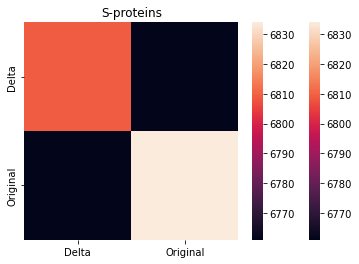

In [62]:
#dataset containing the alignment scores from BLAST alignment
alignment_scores=[[6809,6761],
                 [6761,6834]]

#matrix with the alignment scores and labels for the x-axis
data_matrix=pd.DataFrame(alignment_scores,columns=["Delta","Original"])

#heatplot title is S-proteins 
proteins=sns.heatmap(data_matrix)

#defines the y-axis
sns.heatmap(data_matrix,yticklabels=["Delta","Original"])
proteins.set_title("S-proteins")

# 3D Protein 

Use the data generated from pdb file to allign the sequneces of the protein structurs. comparing their phycial shape to note what the possibilities that the shape might create in terms of the differnces in the infection and dealiness of each variant. 3

In [2]:
env = environ()
aln = alignment(env)
for(pdb, chain) in (('original2', 'A'),('delta2','A')):
    m = model(env, file=pdb, model_segment=('FIRST:'+chain, 'LAST:'+chain))
    aln.append_model(m, atom_files=pdb, align_codes=pdb+chain)
aln.malign()
aln.malign3d()
aln.compare_structures()
#Modeller was not being coaperative

NameError: name 'environ' is not defined

In [ ]:
#I know how to run the code and I got an error saying that the environ is not defined. This is due to technical difficulties
#with Modeller and the license. I obtained a license key but it was not updating, even though I changed it manually from "XXXX"
#to the code I was given. Due to this error, no 3D structure was produced. 

# Result Analysis 

The data that was yielded from the codes was unfortunatly incomplete. I would have liked to comment on the results of the 3D protein to dive deeper into what the physical differences are and how they contrubuted to each S-protein that belongs to the unique variants. I suspect that the S-protein belonging to the delta variant would look more effective in latching onto cells inorder for the virus to infect them easier. So I am expecting a sharper tip of some sorts and a more sturdy frame. These are all shots in the dark though, without having a genarted 3D image to confirm the comparisons. As for the heat map, it showed that there were slight but statistically significant differences in the sequences of the S-proteins. When comparing the variants to themselves, the original variant scored a 6834 and the Delta variant scored a 6809. Both of these numbers were higher than the allignmnt of the varients against eachother, which scored 6761. This was expected as a lower score indicates a more distant relation. An alignmnt score of 6761 was significant enough to be suspeciously different than the individual alignmnet score of each of the vraiants, but not vast enough to think that there was some sort of extensive evolution. This is further shown by the heat map and the color coding indicating the close simialrity between the varaiants. These evidence give truth to my hypothesis and prove it. The Spike protein sequences are different between the Delta and the Original SARS-CoV-2 variants. Meaning that   the increased danger and infection rates are attributed to how the virus binds to host cells due to the S-proteins being different. 